# Coursework (CM3111): Phishing website detection using Random Forest

## 1 - Research & Data Exploration

### 1.1 - Dataset

**Problem**: In cybersecurity, it's well known that the greatest vector attack is the human. That's why social engineering attacks are so popular with attackers. Phishing is one of them, and there are [many ways to practice it](https://www.fortinet.com/resources/cyberglossary/types-of-phishing-attacks).

According to the [NIST](https://csrc.nist.gov/glossary/term/phishing), the definition of phishing is the following one: ***"Tricking individuals into disclosing sensitive personal information through deceptive computer-based means."***

In this coursework, I will train a machine learning algorithm to detect phishing applied to websites.

To solve this problem, I've decided to use **Random Forest**. It's a well-known method to detect phishing websites, with a very high percentage of accuracy *(e.g. [97.36%](https://ieeexplore.ieee.org/abstract/document/8252051))*.

The dataset used is called [Phishing website](https://archive.ics.uci.edu/dataset/327/phishing+websites) and was found on UCI Repository. It was created by **Rami Mohammad** and **Lee McCluskey**, two researchers involved in phishing detection.

This dataset as been made to solve the challenge of finding reliable training datasets for phishing website detection. It has been made by two researchers that have published a large number of papers on this subject. Moreover, each features has been clearly justified, and they explain why it's relevant to phishing detection.

All these criteria led me to choose this dataset.

### 1.2 Related Work & Data Exploration

#### Dataset Overview

This dataset contains characteristics linked to a phishing website. They can be divided into four main types of features:
1. **Address Bar** based Features
2. **Abnormal** Based Features
3. **HTML** and **JavaScript** based Features
4. **Domain** based Features

A total of **30 features** are available to detect phishing sites using machine learning.

#### Objectives

This dataset will be used to detect phishing websites using a random forest algorithm.

Multiple tasks are going to be made:
1. Train a random forest on the 30 features of the dataset
2. Improve efficiency by using the minimum number of features that produces high prediction accuracy
3. Use only URL related features

Once the machine learning algorithm would work, I'll like to improve the algorithm to do random forest using **fully homomorphic encryption** with the [concrete-ml library](https://docs.zama.ai/concrete-ml/).

Finally, I'll create a **streamlit** application which allows the user to determine if it's a phishing or legitimate website using only **URL-related feature**.

#### Peer-Reviewed paper

[PhishNot: A Cloud-Based Machine-Learning Approach to Phishing URL Detection](https://www-sciencedirect-com.ezproxy.rgu.ac.uk/science/article/pii/S1389128622004418) proposes a method for detecting phishing website using **Random Forest** with only **URL-related features**. The underlying idea is to deploy the solution in the cloud, enabling anyone to check the legitimacy of a website. They managed to obtain **97,5% of accuracy** with an average request processing time on the cloud of **11.5 μs per URL**. Working solely on URL, which **improves network protection**, compared with other approaches that need access to the phishing page to predict.
	
The dataset is different from the one I’m going to use, with *111 features* and *88 646 rows*. After a preprocessing *(removing invalid and redundant features)*, they ended with *77 features* and *57 024 rows*. They decided to use **14 features to train their model**. The selection of these features was carried out according to the following process: train and test a model with the available features, then calculate the importance of each feature and remove the feature with the lowest importance. They did that until they reached a minimum number of features producing high prediction accuracy. This part as been done on five classifiers: *Random Forest*, *Logistic Regression*, *Decision Tree*, *Gaussian Naive Bayes* and *Multi-Layer Perceptron*. Once Random Forest proved to be the most efficient algorithm, it was tested on another dataset to check that the model was not overfitted.
	
To validate the high accuracy of their model, they divided the dataset into **75% training** and **25% testing**, and used **10-fold cross-validation** on the reduced-feature data.
	
The only comment I'd like to make on this article concerns user privacy. The URL is sent to the cloud for review, and it would be interesting to see how the model performs using a **fully homomorphic random forest model** that improves privacy.

#### Data Exploration

In [24]:
# Import for data exploration
import pandas as pd
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt

In [25]:
# Load the dataset
raw_data = loadarff('data/training_dataset.arff')
# To displays all the collumns
pd.set_option("display.max.columns", None) 
df = pd.DataFrame(raw_data[0])
df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'-1',b'-1',b'-1',b'0',b'1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',b'1',b'-1',b'1',b'0',b'-1',b'-1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'1',b'0',b'-1',b'-1',b'-1',b'-1',b'0',b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',b'1',b'-1',b'-1',b'0',b'0',b'-1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',b'1',b'1',b'1',b'0',b'0',b'-1',b'1',b'1',b'0',b'-1',b'1',b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'
5,b'-1',b'0',b'-1',b'1',b'-1',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',b'0',b'0',b'-1',b'-1',b'-1',b'0',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'-1',b'-1',b'1'
6,b'1',b'0',b'-1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',b'1',b'1',b'-1',b'-1',b'0',b'-1',b'-1',b'-1',b'0',b'1',b'1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'0',b'-1',b'-1'
7,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',b'1',b'-1',b'-1',b'0',b'-1',b'-1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'0',b'1',b'-1'
8,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',b'0',b'1',b'-1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'1',b'1',b'0',b'1',b'1'
9,b'1',b'1',b'-1',b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'1',b'1',b'1',b'0',b'1',b'-1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'-1',b'1',b'0',b'1',b'-1'


In [26]:
# Size of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 11055 rows and 31 columns


In [27]:
# Get better information on each row of the dataset
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,2
top,b'1',b'-1',b'1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',b'1',b'1',b'1',b'0',b'0',b'-1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'0',b'1',b'1'
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,9553,9259,6560,5337,4449,8440,9041,9426,9776,9740,10579,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


We can observe that each columns have **two** to **three** unique values.

Let's take a look at these values.

In [28]:
# Check the different type of unique data in the dataset
for i in df.columns:
    print(f'{i} has {len(df[i].unique())} unique values, These are: {df[i].unique()}')

having_IP_Address has 2 unique values, These are: [b'-1' b'1']
URL_Length has 3 unique values, These are: [b'1' b'0' b'-1']
Shortining_Service has 2 unique values, These are: [b'1' b'-1']
having_At_Symbol has 2 unique values, These are: [b'1' b'-1']
double_slash_redirecting has 2 unique values, These are: [b'-1' b'1']
Prefix_Suffix has 2 unique values, These are: [b'-1' b'1']
having_Sub_Domain has 3 unique values, These are: [b'-1' b'0' b'1']
SSLfinal_State has 3 unique values, These are: [b'-1' b'1' b'0']
Domain_registeration_length has 2 unique values, These are: [b'-1' b'1']
Favicon has 2 unique values, These are: [b'1' b'-1']
port has 2 unique values, These are: [b'1' b'-1']
HTTPS_token has 2 unique values, These are: [b'-1' b'1']
Request_URL has 2 unique values, These are: [b'1' b'-1']
URL_of_Anchor has 3 unique values, These are: [b'-1' b'0' b'1']
Links_in_tags has 3 unique values, These are: [b'1' b'-1' b'0']
SFH has 3 unique values, These are: [b'-1' b'1' b'0']
Submitting_to_em

Thanks to the `README` of the dataset, we can say that the three different values are:
- 1: **phishing** url
- 0: **suspicious** url
- -1: **legitimate** url

In [29]:
# Give more precise information for each column (i.e. if there is null value in some columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

We can see that there are no **missing values** in any column.

This is good information for further **pre-processing**.

The dataset contains 6157 phishing url, for 4898 legitimate_url


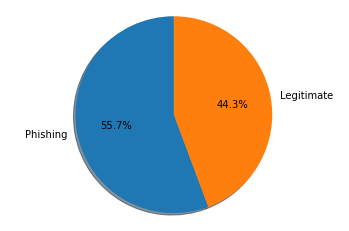

In [30]:
# Check the class distribution
phishing_url = df[df["Result"]==b'1']
legitimate_url = df[df["Result"]==b'-1']
print(f"The dataset contains {len(phishing_url)} phishing url, for {len(legitimate_url)} legitimate_url")

# Create a pie chart to visualize the percentage of each possible result
labels = ["Phishing", "Legitimate"]
sizes = [len(phishing_url), len(legitimate_url)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

The dataset shows a good balance between phishing and legitimate websites.

This helps to reduce bias in our model.

Let's visualize the distribution of each feature of phishing and legitimate websites using bar plots.

*For the sake of readability, I'll do it in 4 cells (3x3).*

In [31]:
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

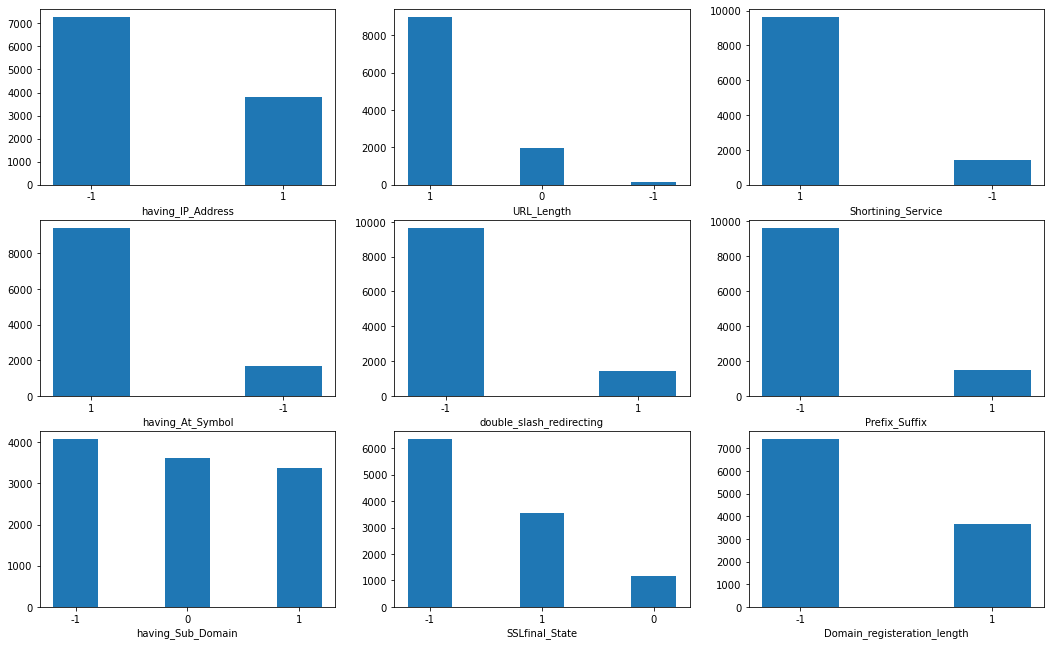

In [32]:
# Define the size of the figure
plt.figure(figsize=(18,11))
width: float = 0.4
# Remove the 'Result' column
all_columns: list = df.columns[:-1] 

# Create 3 plots per row, 3 rows in total
for i in range(1, 10):  
    plt.subplot(3, 3, i)
    plt.bar(df[all_columns[i-1]].unique(), df[all_columns[i-1]].value_counts(), width=width)
    plt.xlabel(all_columns[i-1])
    plt.xticks(df[all_columns[i-1]].unique())

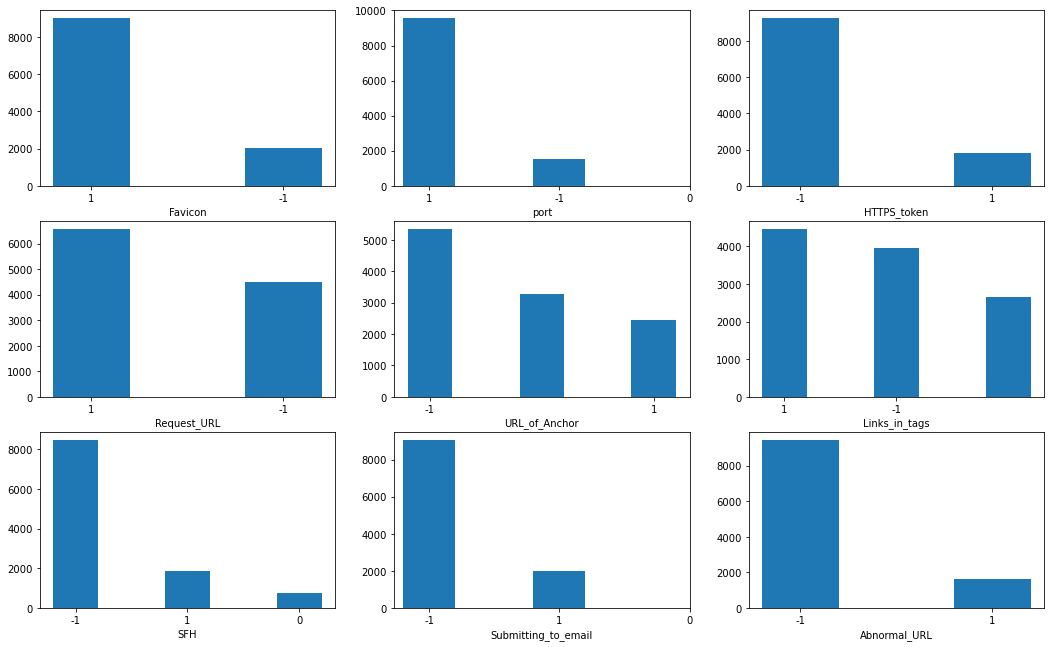

In [33]:
plt.figure(figsize=(18,11))
# 3 plots per row, 3 rows in total
for i in range(1, 10):  
    plt.subplot(3, 3, i)
    plt.bar(df[all_columns[i+8]].unique(), df[all_columns[i+8]].value_counts(), width=width)
    plt.xlabel(all_columns[i+8])
    plt.xticks(df[all_columns[i-1]].unique())

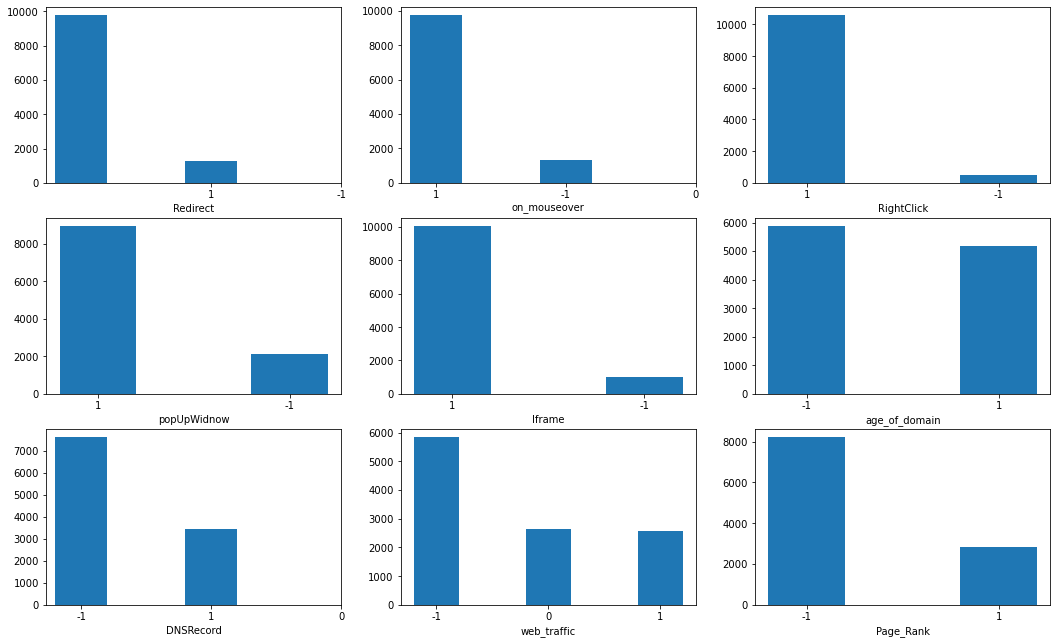

In [34]:
plt.figure(figsize=(18,11))
# 3 plots per row, 3 rows in total
for i in range(1, 10):  
    plt.subplot(3, 3, i)
    plt.bar(df[all_columns[i+17]].unique(), df[all_columns[i+17]].value_counts(), width=width)
    plt.xlabel(all_columns[i+17])
    plt.xticks(df[all_columns[i-1]].unique())

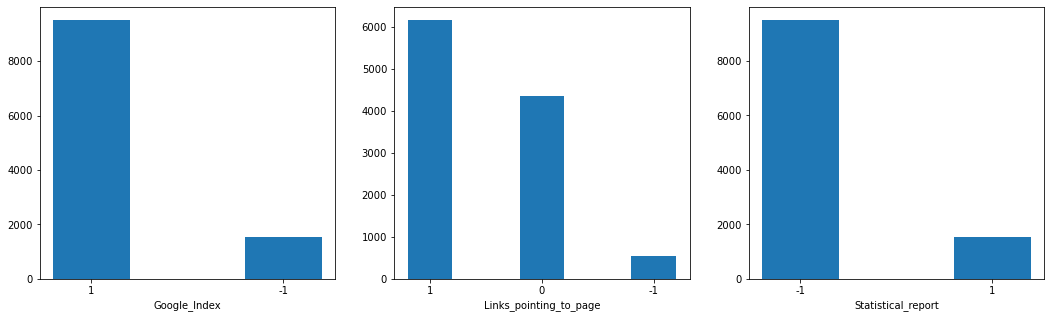

In [35]:
plt.figure(figsize=(18,5))
# 3 plots per row, 1 rows in total
for i in range(1, 4):  
    plt.subplot(1, 3, i)
    plt.bar(df[all_columns[i+26]].unique(), df[all_columns[i+26]].value_counts(), width=width)
    plt.xlabel(all_columns[i+26])
    plt.xticks(df[all_columns[i-1]].unique())

We can observe that most of the time, features are highly imbalanced. These imbalanced features are attributes that strongly distinguished phishing from legitimate websites due to a particular attribute present mainly on only one of these labels.

Therefore, the imbalance of some of our features doesn't seem like a real problem in our case, it makes the features informative.

Let's take a look at the correlation matrix of our dataset!

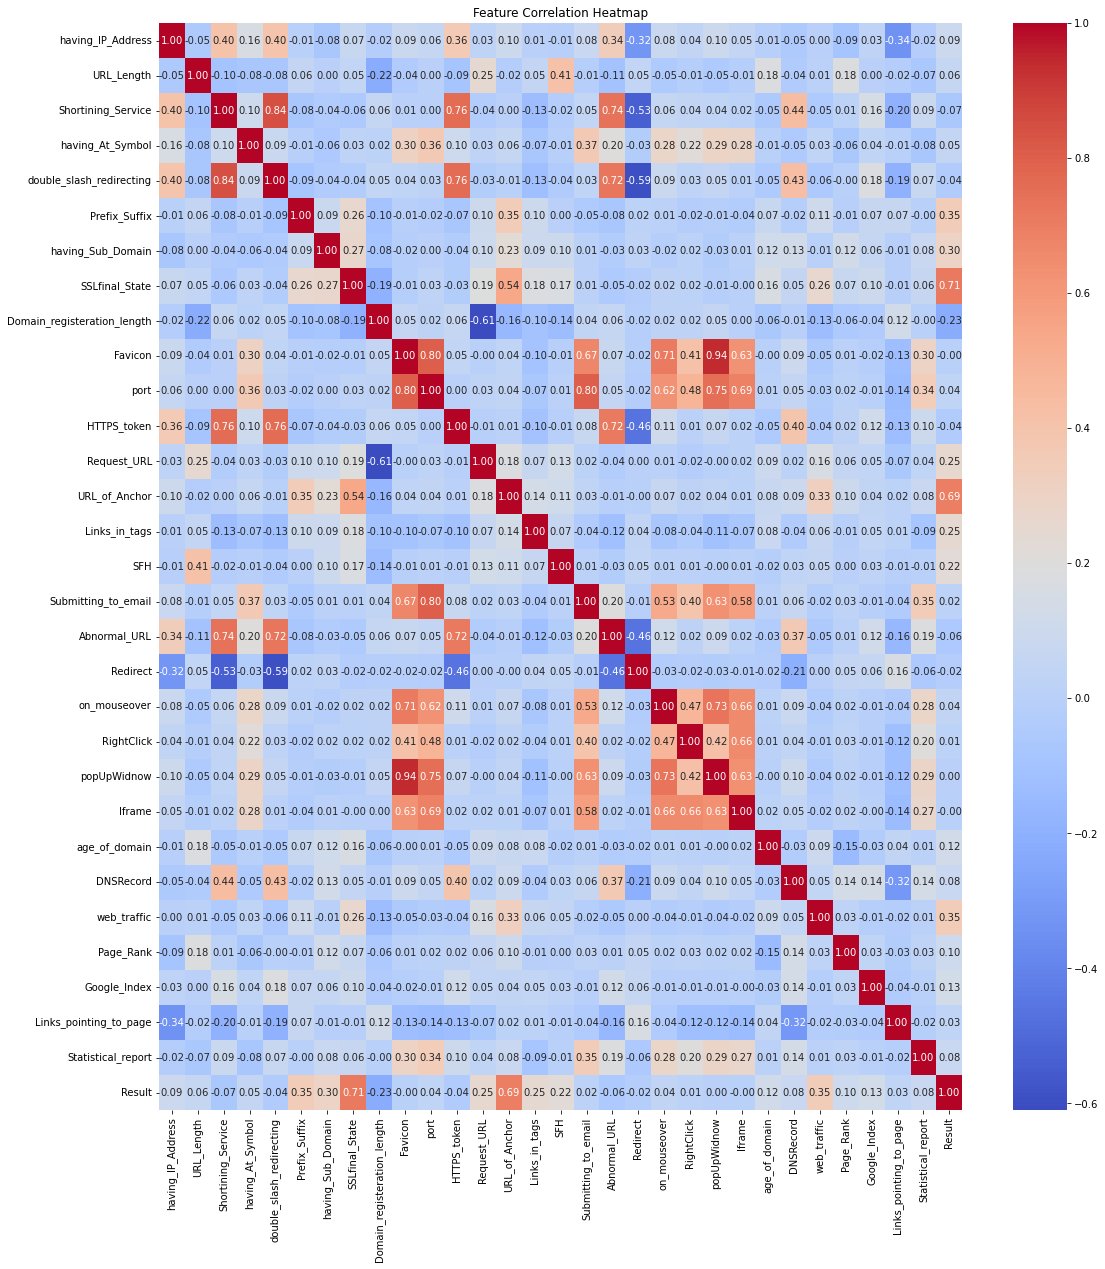

In [36]:
# Get the correlation matrix of our dataset
correlation_matrix = df.corr()
# Import seaborn to visualize the correlation matrix
import seaborn as sns
plt.figure(figsize=(18, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

We can see that certain features are strongly correlated with each other:
- **Favicon** and **popUpWindow**: 0.94
- **Shortining_Service** and **double_slash_redirecting**: 0.84
- **Favicon** and **port**: 0.80

However, most of the features have a correlation close to 0, meaning that there are independent of each others. This may be related to the bar charts above, which show that the difference between the number of legitimate and phishing websites for each feature is generally quite large. In this way, each feature can have a significant impact on prediction without being linked to any other. *(It's only a conjecture)*

Now that we have a good overview of the data, we can start pre-processing it.

### 1.3 Data Pre-processing

According to the data exploration above for each column, there is **no missing values**. Thus, we don't need to apply some missing-values handling methods on the dataset.

We know that each column have between 2 and 3 unique value *(thanks to `df.describe()`)* with possible values:
- -1: **Legitimate** website
- 0: **Suspicious** website
- 1: **Phishing** website

So, there is no need to standardise or normalise the data.

However, the data are read as bytes, so we need to convert each byte to an integer in order to train our model.

In [37]:
# Convert each row values from bytes to integer
for column in df.columns:
    # Check if the column contains byte data
    if df[column].dtype == 'object':
        df[column] = df[column].apply(lambda byte: int(byte.decode()))
        
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


Moreover, the dataset is balanced (**55.7% phishing website** and **44.3% legitimate website**), therefore, we don't need to use sampling methods.

Knowing that this dataset was created by two researchers in the field of phishing detection, in order to address the problem of finding reliable training datasets for this problem, leads to few pre-processing steps. 

However, we can perform some features selection to improve the efficiency of our model. For this part I'm going to use the method explain in the [peer-reviewed paper section](#Peer-Reviewed-paper) which consists to:
1. Train and test the model with the current features
2. Compute the importance of each feature
3. Remove the less important feature
4. Stop if the accuracy of the model is lower than the expected accuracy

In [38]:
# Understand basic feature selection method: https://scikit-learn.org/stable/modules/feature_selection.html
# Feature selection for random forest: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py
from sklearn.model_selection import train_test_split

# store the input features
X = df.drop('Result', axis = 1)
# store the label column into y variable
y = df['Result']
# For reproducibility only
seed: int = 73

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=seed)

In [39]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
import time
import numpy as np

# Compute the feature importance based on mean decrease in impurity
start_time = time.time()
importances = model_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_1.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.010 seconds


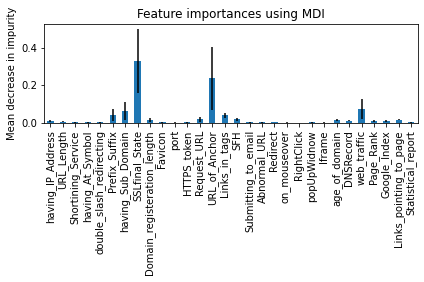

In [41]:
# Display the feature importances with a bar chart
model_1_importances = pd.Series(importances, index = list(X.columns))

fig, ax = plt.subplots()
model_1_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

We can easily observe that some feature are more important than others in this dataset.

However, scikit learn warn us that "**Impurity-based feature importance** can be misleading for high cardinality features (many unique values)." *[(source)](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#feature-importance-based-on-mean-decrease-in-impurity)*

None of our features has a high cardinality, as there are at most 3 unique values per column. But we can try the other method to see if the plot changes. *(It's interesting for learning purposes)*

To overcome the limitations of the impurity-based feature importance, we can use **permutation feature importance**.

Permutation feature importance don't have a bias toward high-cardinality features and can be computed on a left-out test set.

In [42]:
# Permutation feature importance
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    model_1, X_test, y_test, n_repeats = 10, random_state = seed, n_jobs = 2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

model_1_importances = pd.Series(result.importances_mean, index = list(X.columns))

Elapsed time to compute the importances: 6.042 seconds


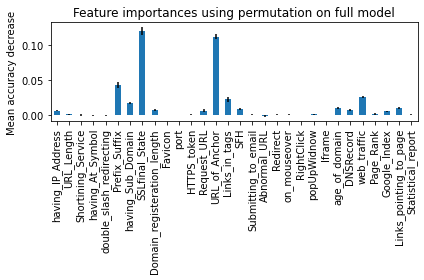

In [43]:
# Plot the result of the permutation feature importance
fig, ax = plt.subplots()
model_1_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Mostly the same feature are detected as most important using both methods.

However, some of them have gained in importance with the permutation feature importance.

This plot is more easy to read and give almost the same information than the one with impurity-based feature importance.

---

With these two plots, we can see that some features are not that important in the dataset. Thus, we're going to reduce the number of features.

But first, let's have a look at the current prediction of the model with all the features. This will give us an idea of the model's performance without optimization.

In [44]:
from sklearn import metrics 
prediction_1 = model_1.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_1)))

Mean Absolute Error: 0.06367583212735166
Mean Squared Error: 0.12735166425470332
Root Mean Squared Error: 0.3568636493882549


In [45]:
from sklearn.metrics import accuracy_score, classification_report
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test,prediction_1), 4)}')

The Model Accuracy on Testing Set is 0.9682


In [46]:
# Use the classification report to get other evaluation metric on our model
print(classification_report(y_test, prediction_1))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1244
           1       0.97      0.98      0.97      1520

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764



Let's do some **cross-validation** to get a real feel for the model's prediction and verify that his not **overfitting**.

In [47]:
# https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# For reproducibility only
kf = KFold(n_splits=10, shuffle=True, random_state=seed)

# Compute the score 10 consecutive times with different splits each time
scores_basic_model = cross_val_score(model_1, X, y, cv=kf)
scores_basic_model

array([0.96925859, 0.96745027, 0.9801085 , 0.96835443, 0.96745027,
       0.97466063, 0.97375566, 0.97556561, 0.96923077, 0.98099548])

In [48]:
# Standard deviation is the difference average between each round of the cross-validation
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores_basic_model.mean(), scores_basic_model.std()))

0.9727 accuracy with a standard deviation of 0.0048


Our model has a pretty good accuracy *($\approx$ 97.30%)* and a really small standard deviation of $\approx$ 0.0050%, without any pre-processing.

Moreover, the precision, recall and f-1 score all average 97%, which is good.

However, we can try to reduce the number of features to improve the efficiency of our model and keep an accuracy of 97%.

*The method for the feature selection is explained at the beginning of the [Pre-Processing part](#1.3-Data-Pre-processing).*

In [49]:
def improve_model_efficiency(df, accuracy_expected: int = 0.95, model_test_size: int = 0.25, result_column: str = "Result"):
    """ Improve the model efficiency by reducing the number of feature until the accuracy is lower than the one expected
    
    Args:
        df : Data Frame of the dataset
        accuracy_expected (int): Accurracy expected for the model
        model_test_size (int): Size for the testing dataset [Percentage]
        result_column (str): Dataset labels
        
    Output:
        List of the minimum features necessary to train the model with the expected accuracy 
    """
    # This array is initialise with the label column
    features_drop: list[str] = [result_column]
    # This variable is there only for reproducibility
    seed: int = 41417
    while True:
        # Drop less important current input features
        X = df.drop(features_drop, axis = 1)
        y = df['Result']
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=model_test_size, random_state=seed)
        current_model = RandomForestClassifier()
        # Train the model
        current_model.fit(X_train, y_train)
        current_prediction = current_model.predict(X_test)
        # Checks whether the expected accuracy is still achieved with fewer features
        if round(accuracy_score(y_test,current_prediction), 2) < accuracy_expected:
            if len(features_drop) > 1:
                # Return all the current feature and the last removed feature to get the wanted accuracy
                print(f"The model has been reduced to {len(X.columns) + 1} features")
                return df.drop(features_drop[:-1], axis = 1)
            # Even with all the features, the accuracy is below what is expected
            print("We cannot remove feature to satisfy the expected accuracy")
            return df.drop(result_column, axis = 1)
        
        print(f"Test with {len(X.columns)} features")
        # Compute the importance of each remaining features
        features_importance = permutation_importance(
            current_model, X_test, y_test, n_repeats = 10, random_state = seed, n_jobs = 2
        )
        current_model_importance = pd.Series(features_importance.importances_mean, index = list(X.columns))
        # Remove the less important feature
        features_drop.append(current_model_importance.sort_values().index[0])
        # For reproducibility only
        seed += 1

        
print("Optimization with an expectation of 97% of accuracy")
X_optimized_97 = improve_model_efficiency(df, 0.97)

Optimization with an expectation of 97% of accuracy
Test with 30 features
Test with 29 features
Test with 28 features
Test with 27 features
Test with 26 features
Test with 25 features
Test with 24 features
Test with 23 features
Test with 22 features
Test with 21 features
Test with 20 features
Test with 19 features
Test with 18 features
Test with 17 features
The model has been reduced to 17 features


> **Note**: The expected accuracy can be 1% lower if the training test split is unlucky.
>
> To solve this problem, we can run this algorithm several times, retaining only the feature most present in each round. It's similar to the cross-validation method.
>
> In our case, I used a random seed to make the notebook 100% reproducible.

## 2 - Modelling/ Classification

Now that the preprocessing part as been done, and the number of features reduce in order to improve the model efficiency, we can check what are the actual result of our optimized model.

In [50]:
X_optimized_97

,having_IP_Address,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page
0,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,1,1
1,1,-1,0,1,-1,-1,1,0,-1,-1,1,-1,-1,0,-1,1,1
2,1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,1,-1,1,-1,1,0
3,1,-1,-1,-1,1,-1,-1,0,0,-1,1,-1,-1,1,-1,1,-1
4,1,-1,1,1,-1,1,1,0,0,-1,1,-1,-1,0,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,1,1,1,-1,1,1,1,1,-1,-1,1,1,-1,-1,1,1
11051,-1,-1,1,-1,-1,1,1,-1,-1,0,-1,1,1,1,1,1,-1
11052,1,-1,1,-1,-1,1,1,0,-1,-1,1,1,1,1,-1,1,0
11053,-1,-1,-1,-1,1,1,-1,-1,1,-1,1,1,1,1,-1,1,1


In [51]:
# 97% accuracy expected
X_train, X_test, y_train, y_test = train_test_split(X_optimized_97, y,  test_size=0.25, random_state=seed)
optimized_model_97 = RandomForestClassifier()
optimized_model_97.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
optimized_prediction_97 = optimized_model_97.predict(X_test)

print("With 97% of accuracy expected")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, optimized_prediction_97))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, optimized_prediction_97))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, optimized_prediction_97)))
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test, optimized_prediction_97), 4)}')

With 97% of accuracy expected
Mean Absolute Error: 0.0694645441389291
Mean Squared Error: 0.1389290882778582
Root Mean Squared Error: 0.3727319254878205
The Model Accuracy on Testing Set is 0.9653


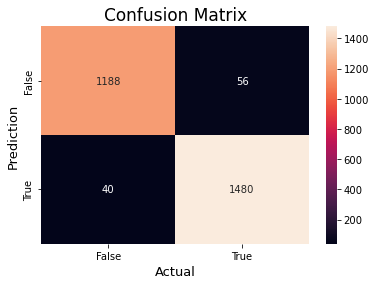

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, optimized_prediction_97)
 
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['False','True'],
            yticklabels=['False','True'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [54]:
print(classification_report(y_test, optimized_prediction_97))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1244
           1       0.96      0.97      0.97      1520

    accuracy                           0.97      2764
   macro avg       0.97      0.96      0.96      2764
weighted avg       0.97      0.97      0.97      2764



The prediction result looks pretty good. The **prediction is $\approx$ 0.3% worse** on this split than with all features, which is not a big lost of accuracy, but the model's efficiency has been improved with only **17 features** compared to **30** previously.

Furthermore, the classification report shows that the precision, recall and f-1 score have all a weighted average of $97\%$ as the model with all the features, and a slightly lower macro average for recall and f1-score, but nothing significant.

It's a fair compromise. Moreover, if for example we want to deploy the model on the cloud, the efficiency of the model is an important parameter.

However, we need to check that the model is not overfitting the testing dataset, using cross-validation.

For that, I'm going to compute the prediction score **10 consecutive times** *(with different splits each time)*.

In [55]:
scores_optimized_model = cross_val_score(optimized_model_97, X_optimized_97, y, cv=kf)
scores_optimized_model

array([0.96654611, 0.96835443, 0.97468354, 0.97016275, 0.97106691,
       0.97737557, 0.96832579, 0.97375566, 0.9638009 , 0.97828054])

In [56]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores_optimized_model.mean(), scores_optimized_model.std()))

0.9712 accuracy with a standard deviation of 0.0045


The cross-validation show that the model is not overfitting, and we have a lost of $\approx$ 0.20% accuracy for a more efficient model.

The **MEA**, **MSE** and **RMSE** are very low, wich is a good information about the quality of our model.

---

***Reminder*** [(source)](https://github.com/heyad/Teaching/blob/master/Python-Intro/Regression.ipynb):
- Mean Absolute Error $MAE= \frac{1}{n}\sum_{i=1}^{n}|y-\hat{y}|$, where $y$ is the actual output and $\hat{y}$ is the predicted value,
- Mean Squared Error $MSE= \frac{1}{n}\sum_{i=1}^{n}|y-\hat{y}|^2$, where $y$ is the actual output and $\hat{y}$ is the predicted value,
- Root Mean Squared Error $RMSE=\sqrt{ \frac{1}{n}\sum_{i=1}^{n}|y-\hat{y}|^2}$, where $y$ is the actual output and $\hat{y}$ is the predicted value.

---

Knowing that our predicted and actual output can be between -1 and 1, the value of **MEA**, **MSE** and **RMSE** is going to be very low.

In this case, the **Confusion Matrix** is probably better to determine the efficiency of our model.

Above, we can see this confusion matrix, and we observe, that the number of **false positive** and **false negative** is very low.

We can conclude that our model is a good one.

## 3 - Solution Improvement

Even if our model achieves already $\approx$ 97% of accuracy, we can try to see if we can improve this accuracy.

For that we're going to test multiple improvements:
- Change training and testing partitioning
- Try with a gradient boosted trees
- Fine tune the parameters
- FHE homomorphic encryption
- URL related features

### Test with different training and testing partitioning

In this section we're going to see if the partitioning of the training and testing data can impact the accuracy of our model.

For that we're going to test 3 other partitionings taking care to keep sufficient data for testing.



In [57]:
# With 25% of training and 75% of testing
X_train, X_test, y_train, y_test = train_test_split(X_optimized_97, y,  test_size=0.75, random_state=seed)
optimized_model_97_75 = RandomForestClassifier()
optimized_model_97_75.fit(X_train, y_train)
optimized_prediction_97_75 = optimized_model_97_75.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, optimized_prediction_97_75))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, optimized_prediction_97_75))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, optimized_prediction_97_75)))
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test, optimized_prediction_97_75), 4)}')

Mean Absolute Error: 0.08707187650747708
Mean Squared Error: 0.17414375301495416
Root Mean Squared Error: 0.4173053474554983
The Model Accuracy on Testing Set is 0.9565


In [58]:
scores_75_test = cross_val_score(optimized_model_97_75, X_optimized_97, y, cv=kf)
scores_75_test

array([0.96383363, 0.96745027, 0.97468354, 0.97106691, 0.97377939,
       0.97466063, 0.97375566, 0.97466063, 0.96561086, 0.97737557])

In [59]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores_75_test.mean(), scores_75_test.std()))

0.9717 accuracy with a standard deviation of 0.0043


With a **25% of training** and **75% of testing**, we don't observe any interesting change on the *accuracy*, *MAE*, *MSE* and *RMSE*.

In [60]:
# With 50% of training and 50% of testing
X_train, X_test, y_train, y_test = train_test_split(X_optimized_97, y,  test_size=0.50, random_state=seed)
optimized_model_97_50 = RandomForestClassifier()
optimized_model_97_50.fit(X_train, y_train)
optimized_prediction_97_50 = optimized_model_97_50.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, optimized_prediction_97_50))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, optimized_prediction_97_50))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, optimized_prediction_97_50)))
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test, optimized_prediction_97_50), 4)}')

Mean Absolute Error: 0.07091172214182344
Mean Squared Error: 0.14182344428364688
Root Mean Squared Error: 0.3765945356529312
The Model Accuracy on Testing Set is 0.9645


In [61]:
scores_50_test = cross_val_score(optimized_model_97_50, X_optimized_97, y, cv=kf)
scores_50_test

array([0.96383363, 0.97016275, 0.9755877 , 0.96925859, 0.97377939,
       0.9719457 , 0.97285068, 0.9719457 , 0.9638009 , 0.97737557])

In [62]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores_50_test.mean(), scores_50_test.std()))

0.9711 accuracy with a standard deviation of 0.0043


With a **50% of training** and **50% of testing**, we don't observe any interesting change on the *accuracy*, *MAE*, *MSE* and *RMSE*.

In [63]:
# With 80% of training and 20% of testing
X_train, X_test, y_train, y_test = train_test_split(X_optimized_97, y,  test_size=0.20, random_state=seed)
optimized_model_97_20 = RandomForestClassifier()
optimized_model_97_20.fit(X_train, y_train)
optimized_prediction_97_20 = optimized_model_97_20.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, optimized_prediction_97_20))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, optimized_prediction_97_20))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, optimized_prediction_97_20)))
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test, optimized_prediction_97_20), 4)}')

Mean Absolute Error: 0.06603346901854365
Mean Squared Error: 0.1320669380370873
Root Mean Squared Error: 0.36341015125762144
The Model Accuracy on Testing Set is 0.967


In [64]:
scores_20_test = cross_val_score(optimized_model_97_20, X_optimized_97, y, cv=kf)
scores_20_test

array([0.96835443, 0.96835443, 0.97377939, 0.96925859, 0.97106691,
       0.97285068, 0.97104072, 0.97285068, 0.96289593, 0.97556561])

In [65]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores_20_test.mean(), scores_20_test.std()))

0.9706 accuracy with a standard deviation of 0.0034


With a **80% of training** and **20% of testing**, we don't observe any interesting change on the *accuracy*, *MAE*, *MSE* and *RMSE*.

We can conclude that the partitioning of the dataset has little impact on the accuracy of our model in our case.

### Try with a [gradient boosted trees](https://xgboost.readthedocs.io/en/stable/tutorials/model.html)

Gradient boosted trees can be a good alternative to random forest and may be more efficient.

I'll try to train a gradient boosted trees with the 30 features of the dataset and see if we get a better prediction than the random forest *(i.e. 97%)*.

> **Note**: We need a to do a bit of preprocessing before the creation of the gradient boosted trees, because the result value should be 0 or 1 and in our case it's -1 and 1.

In [66]:
# Remove FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Use of the XGBoost library for gradient boosted trees
from xgboost import XGBClassifier
# We replace all the -1 in the result column to 0
X_train, X_test, y_train, y_test = train_test_split(X, y.replace(-1, 0),  test_size=0.25, random_state=seed)
# Create the model
gradient_boosted_trees = XGBClassifier()
gradient_boosted_trees.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
gradient_boosted_trees_prediction = gradient_boosted_trees.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, gradient_boosted_trees_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gradient_boosted_trees_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gradient_boosted_trees_prediction)))
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test, gradient_boosted_trees_prediction), 4)}')

Mean Absolute Error: 0.03219971056439942
Mean Squared Error: 0.03219971056439942
Root Mean Squared Error: 0.17944277796668057
The Model Accuracy on Testing Set is 0.9678


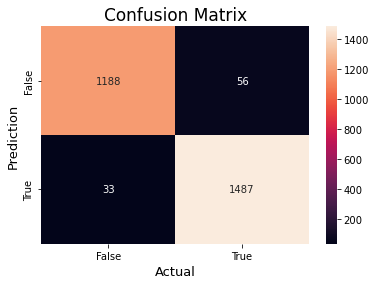

In [68]:
cm_xgboost = confusion_matrix(y_test, gradient_boosted_trees_prediction)
 
#Plot the confusion matrix.
sns.heatmap(cm_xgboost,
            annot=True,
            fmt='g',
            xticklabels=['False','True'],
            yticklabels=['False','True'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [69]:
print(classification_report(y_test, gradient_boosted_trees_prediction))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1244
           1       0.96      0.98      0.97      1520

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764



In [70]:
cross_validation_scores_gradient_boosted_trees = cross_val_score(gradient_boosted_trees, X, y.replace(-1, 0), cv=kf)
cross_validation_scores_gradient_boosted_trees

array([0.97197107, 0.96112116, 0.97739602, 0.97016275, 0.97106691,
       0.97647059, 0.97285068, 0.97918552, 0.96561086, 0.97828054])

In [71]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_validation_scores_gradient_boosted_trees.mean(), cross_validation_scores_gradient_boosted_trees.std()))

0.9724 accuracy with a standard deviation of 0.0055


We can't observe any interesting improvement *(only $0.1%$ better)* using the gradient boosted tree with the default tunning, compare to the random forest with default tunning.

The only difference concerns the *MAE*, *MSE* and *RMSE* which is explained by the fact that the results are now 0 and 1 compared to -1 and 1 for the random forest.

### Random Forest Parameters Tunning

We now know that the random forest is a good model for this problem.

Let's try to improve it with parameters tunning! *[(source used to understand hyperparameter tunning)](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)*

For that, we're going to use two methods:
- **Randomized search**,
- **Grid search**.

*Knowing that this notebook is for learning purpose, I think it's useful to test two methods of parameters tunning.*

For each method, we'll carry out **3 cross-validations** to minimize the risk of overfitting, while ensuring a suitable execution time for each of them.

In [72]:
# Current parameter of our model
print(optimized_model_97.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


#### Randomized Search

This method doesn't try all of the parameter values we're going to give, but a fixed number of parameter settings from the specified distributions.

This is an interesting way to tune our model without testing all the parameter combinations, which can save a lot of time.

In [73]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['log2', 'sqrt', None],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

We're going to test **100 different combinations** with each time **3 cross-validations**.

The parameters to test are passed to the `RandomizedSearchCV` using the `param_distributions` parameter, the number of different combinations and cross-validation correspond respectively to `n_iter` and `cv`.

Finally, I used a `random_state` for reproducibility and `n_jobs` is set to $-1$, which mean that we use all processors for time saving.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_optimized_97, y,  test_size=0.25, random_state=seed)
kf_tunning = KFold(n_splits=3, shuffle=True, random_state=seed)

rf_random = RandomizedSearchCV(estimator = optimized_model_97, param_distributions = random_grid, n_iter = 100, cv = kf_tunning, verbose=2, random_state=seed, n_jobs = -1)
# Take a few minutes
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=73, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=73, verbose=2)

In [75]:
tune_parameters = rf_random.best_params_
tune_parameters

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [76]:
tune_model = RandomForestClassifier(n_estimators=tune_parameters["n_estimators"], 
                                    min_samples_split=tune_parameters["min_samples_split"], 
                                    min_samples_leaf=tune_parameters["min_samples_leaf"], 
                                    max_features=tune_parameters["max_features"], 
                                    max_depth=tune_parameters["max_depth"], 
                                    bootstrap=tune_parameters["bootstrap"])
tune_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=60, n_estimators=1400)

In [77]:
tune_model_prediction = tune_model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tune_model_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tune_model_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tune_model_prediction)))
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test, tune_model_prediction), 4)}')

Mean Absolute Error: 0.06801736613603473
Mean Squared Error: 0.13603473227206947
Root Mean Squared Error: 0.368828865833559
The Model Accuracy on Testing Set is 0.966


In [78]:
scores_tune_model = cross_val_score(tune_model, X_optimized_97, y, cv=kf)
scores_tune_model

array([0.96383363, 0.97016275, 0.97468354, 0.96745027, 0.97287523,
       0.97556561, 0.97375566, 0.97737557, 0.96470588, 0.9800905 ])

In [79]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores_tune_model.mean(), scores_tune_model.std()))

0.9720 accuracy with a standard deviation of 0.0051


In [80]:
# Show improvement
print(f"Improvement: {(scores_tune_model.mean() * 100) - (scores_optimized_model.mean() * 100)}%")

Improvement: 0.08146432867205533%


We have an no interesting improvement with this parameter tunning.

The model takes much longer to train, due to the increase in the number of trees from 100 to 1400. Given that phishing detection needs to be fast, to allow the user to navigate with as little latency as possible, this tuns is not a success.

However, we can try to do the tunning using the **Grid search method** to see if we find a better tunning.

#### Grid search

The difference with randomized search is that, this time, we're going to perform an exhaustive search on all the values of the specified parameters.

According to the randomized search and our optimized model parameters, I'm going to give few parameters to the grid search, knowing that it's an exhaustive search.

We can observe that:
- `min_samples_leaf` is equal to $1$ for the two models,
- We want to have a good efficiency of our model so we're going to set `bootstrap` to `True`,
- `max_features` is `log2` for the randomized search and `sqrt` for the random forest without tunning,
- We're going to use the default number of trees to keep a good efficiency of our model (`n_estimators = 100`)
- `min_samples_split` is equal to $5$ for the randomized search and $2$ for the default value,
- The default parameter for `max_depth` is `None` and the randomized search is $20$.

In [81]:
from sklearn.model_selection import GridSearchCV
# Parameters to check
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [20, 30, 40, 90, 100, 110, None],
    'max_features': ["log2", "sqrt"],
    'min_samples_leaf': [1],
    'min_samples_split': [2, 5],
    'n_estimators': [100]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = optimized_model_97, param_grid = param_grid, cv = kf_tunning, n_jobs = -1, verbose = 2)
# Take one minute
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 56 candidates, totalling 168 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=110, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=110, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.8s
[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   8.3s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=  12.0s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators

GridSearchCV(cv=KFold(n_splits=3, random_state=73, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [20, 30, 40, 90, 100, 110, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [2, 5],
                         'n_estimators': [100]},
             verbose=2)

In [82]:
tune_param2 = grid_search.best_params_
tune_param2

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [83]:
tune_model2 = RandomForestClassifier(n_estimators=tune_param2["n_estimators"], 
                                    min_samples_split=tune_param2["min_samples_split"], 
                                    min_samples_leaf=tune_param2["min_samples_leaf"], 
                                    max_features=tune_param2["max_features"], 
                                    max_depth=tune_param2["max_depth"], 
                                    bootstrap=tune_param2["bootstrap"])
tune_model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=110, max_features='log2')

In [84]:
tune_model2_prediction = tune_model2.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tune_model2_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tune_model2_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tune_model2_prediction)))
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test, tune_model2_prediction), 4)}')

Mean Absolute Error: 0.06801736613603473
Mean Squared Error: 0.13603473227206947
Root Mean Squared Error: 0.368828865833559
The Model Accuracy on Testing Set is 0.966


In [85]:
scores_tune_model2 = cross_val_score(tune_model2, X_optimized_97, y, cv=kf)
scores_tune_model2

array([0.96473779, 0.96925859, 0.97468354, 0.96745027, 0.97468354,
       0.97466063, 0.97104072, 0.97375566, 0.96561086, 0.98190045])

In [86]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores_tune_model2.mean(), scores_tune_model2.std()))

0.9718 accuracy with a standard deviation of 0.0049


In [87]:
print(f"Improvement: {(scores_tune_model2.mean() * 100) - (scores_optimized_model.mean() * 100)}%")

Improvement: 0.05429864253392225%


The improvement is negligible using the grid search for hyperparameter tunning.

To conclude, the random forest parameter tunning was not a success. But this result is to be expected, given that our model performs really well with default parameters ($\approx 97\%$) without overfitting the dataset *(according to the results of the various cross-validation)*, it's a difficult task to find a tunning that will improve accuracy.

### FHE Machine Learning

The idea in this part is to use Fully Homomorphic Encryption in order to improve privacy with our machine learning model.

However, the library concrete-ml doesn't support the latest version of `sklearn` and `xgboost`.

Technically, it's not a big deal to change the version of `sklearn` and `xgboost` to fit with `concrete-ml`. 

However, it would raise warning in all the notebook and can reduce the efficiency of previous models that might have been improved on the latest version.

Here the functional code of `concrete-ml` if you have the correct version of `sklearn`:
```python
# pip install concrete-ml
from concrete.ml.sklearn import RandomForestClassifier as ConcreteRandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_optimized_97, y,  test_size=0.25)
optimized_model_97_FHE = ConcreteRandomForestClassifier()
optimized_model_97_FHE.fit(X_train, y_train)
optimized_prediction_97_FHE = optimized_model_97_FHE.predict(X_test)
```

We can see that the code is very similar to the previous one without FHE. It's a great thing, because it allows machine learning developer to use FHE on their model easily and by consequence, improve the privacy of them.

If you're interesting to read and understand more about FHE machine learning, you have a lot of articles and [demo](https://huggingface.co/spaces/zama-fhe/encrypted_image_filtering) on the [concrete-ml documentation](https://docs.zama.ai/concrete-ml/getting-started/showcase).

### Use only URL-related features to improve network security

In this part, we're going to use only the **Address Bar based Features** in order to train or model.

The purpose behind that, is to simulate a real-world example of the usage of machine learning algorithm using only URL-related features to determine if a website is a phishing or legitimate website.

This improves security, as it is not necessary to load the page to determine whether or not it is a malicious website. The second objective of this model is to obtain a prediction in a very short time, so as not to slow down the user's navigation while validating the url.

To illustrate the real-world example, once the model as been train, and we get an accuracy acceptable, I'm going to create a streamlit app where you can put a URL and the model is going to determine the type of website.

The major issue is that we have only **12 features** that can be used, based on our dataset:
- `having_IP_Address`
- `URL_Length`
- `Shortining_Service`
- `having_At_Symbol`
- `double_slash_redirecting`
- `Prefix_Suffix`
- `having_Sub_Domain`
- `SSLfinal_State`
- ~`Domain_registeration_length`~  `age_of_domain`
- `Favicon`
- `port`
- `HTTPS_token`

I've replace the `Domain_registeration_length` feature with the `age_of_domain` *(from the domain based features)*, because the `Domain_registeration_length` description *(check dataset README)* say the following thing: `if domain_expiration <= 1 then "Phishing" else "Legitimate"`.

However, when you check the domain expiration of [youtube.com on Whois](https://who.is/whois/youtube.com), you get the following expiration date: **2024-02-15** *(made the 25/10/2023)*. So I consider the feature `age_of_domain` more reliable.

In [88]:
X = df[["having_IP_Address", "URL_Length", "Shortining_Service", "having_At_Symbol", "double_slash_redirecting"
       , "Prefix_Suffix", "having_Sub_Domain", "SSLfinal_State", "age_of_domain", "Favicon", "port", "HTTPS_token"]]
y = df['Result']
X

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,age_of_domain,Favicon,port,HTTPS_token
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,1,-1
3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,1,-1,-1,1
11051,-1,1,1,-1,-1,-1,1,-1,1,-1,-1,1
11052,1,-1,1,1,1,-1,1,-1,1,1,1,1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,1,1


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=seed)
url_based_model = RandomForestClassifier()
url_based_model.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
url_based_model_prediction = url_based_model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, url_based_model_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, url_based_model_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, url_based_model_prediction)))
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test, url_based_model_prediction), 4)}')

Mean Absolute Error: 0.19319826338639653
Mean Squared Error: 0.38639652677279307
Root Mean Squared Error: 0.6216080169791837
The Model Accuracy on Testing Set is 0.9034


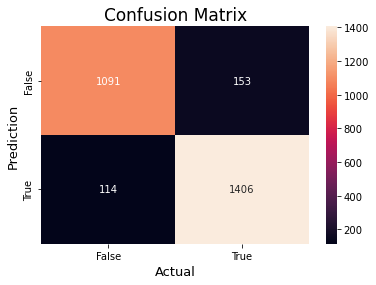

In [91]:
cm_url_based_model = confusion_matrix(y_test, url_based_model_prediction)
 
#Plot the confusion matrix.
sns.heatmap(cm_url_based_model,
            annot=True,
            fmt='g',
            xticklabels=['False','True'],
            yticklabels=['False','True'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [92]:
print(classification_report(y_test, url_based_model_prediction))

              precision    recall  f1-score   support

          -1       0.91      0.88      0.89      1244
           1       0.90      0.93      0.91      1520

    accuracy                           0.90      2764
   macro avg       0.90      0.90      0.90      2764
weighted avg       0.90      0.90      0.90      2764



In [93]:
scores_url_based_model = cross_val_score(url_based_model, X, y, cv=kf)
scores_url_based_model

array([0.90596745, 0.89963834, 0.91681736, 0.90777577, 0.91048825,
       0.92217195, 0.90678733, 0.92126697, 0.90135747, 0.90497738])

In [94]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores_url_based_model.mean(), scores_url_based_model.std()))

0.9097 accuracy with a standard deviation of 0.0075


Unsurprisingly, the accuracy of our model decreases considerably. This is probably due to the small number of features available.

Nonetheless, we still have an honorable accuracy of $\approx 91\%$. The precision, recal and f1-score all average $\approx 91\%$ too, which is still a good result.

In case of real-life implementation, I'll try to improve this accuracy by finding new features related to the URL or domain that does not need to load the website.

However, doing this will ask me to recreate a dataset with these new features included, and it's not the purpose of this project.

Therefore, I'll make do with $\approx 91\%$ accuracy to develop the streamlit example.

For that, we need to export our model.

In [95]:
import pickle

# Save to file in the current working directory
pkl_filename = "phishing_website_detection_rf_url_based_model.pkl"
# save your model that was created above (lg_model)
with open(pkl_filename, 'wb') as file:
    pickle.dump(url_based_model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Lets test the mode loaded from a file and check results
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_hat = pickle_model.predict(X_test)

Test score: 90.34 %
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=110, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   9.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   9.3s
[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   9.6s
[CV] END bootstrap=True, max_depth=100, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   9.7s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   8.6s
[CV] END boo

[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   4.0s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   9.4s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=  11.7s
[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   9.6s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   9.8s
[CV] END bootstrap=True, max_depth=110, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   6.8s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   6.2s
[CV] END bootstrap=False, max_depth=8

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s


## Conclusion

Our model has $\approx 97\%$ accuracy with only **17 features** out of **30**, which improve the efficiency of our model. 

Despite the different improvement methods used, the accuracy is still at $97\%$, but it's a very satisfactory result base on other papers using random forest to train their model.

Finally, our Url and Domain based model achieve $\approx 91\%$ accuracy. Knowing the number of features used *(only 12)* it's a good result.

> **Info**: To run the streamlit app that allow you to determine if it's a phishing or legitimate website based on URL do the following command: `streamlit run phishing_website_detection_app.py`